### Check the hard recognable tiles visually.



In [2]:
from notebooks import config
import geopandas as gpd
import numpy as np
from utils.geotif_io import readTiff, writeTiff
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from utils.transform_xy import geo2imagexy
from glob import glob


In [21]:
path_vector = config.root_proj + '/data/tibet/tibet_tiles_vec/tibet_tiles.gpkg'
tiles_gdf = gpd.read_file(path_vector)
tiles_gdf.head()


area         proj tile_id  \
0  10852.910371  EPSG: 32646     001   
1  10856.066053  EPSG: 32646     002   
2  10853.222782  EPSG: 32647     003   
3  10856.025776  EPSG: 32647     004   
4  10850.995157  EPSG: 32647     005   

                                            geometry  
0  MULTIPOLYGON (((91.60292 25.97742, 91.60292 26...  
1  MULTIPOLYGON (((92.59904 25.97742, 92.59904 26...  
2  MULTIPOLYGON (((97.64819 25.97742, 97.64819 26...  
3  MULTIPOLYGON (((98.64468 25.97742, 98.64468 26...  
4  MULTIPOLYGON (((99.64905 25.97742, 99.64905 26...

### **Check the prediction water map**

In [ ]:
paths_wat = glob(config.root_tb_data+'/tiles-check/*.tif')
paths_wat.sort()

# ### check one tile
# month_id, tile_id = '202008', '236'
# path_s1as_img = config.root_tb_data + '/tibet-'+month_id+'/s1-ascend/tibet_s1as_'+month_id+'_tile_'+tile_id+'.tif'
# path_wat = config.root_tb_data +'/tiles-check'+'/tibet_s1_'+month_id+'_tile_'+tile_id+'_water.tif'

### check all tiles
for path_wat in paths_wat:
  print(path_wat)
  month_id, tile_id = path_wat[-25:-19], path_wat[-13:-10]
  path_s1as_img = config.root_tb_data + '/tibet-'+month_id+'/s1-ascend/tibet_s1as_'+month_id+'_tile_'+tile_id+'.tif'
  path_s1des_img = config.root_tb_data + '/tibet-'+month_id+'/s1-descend/tibet_s1des_'+month_id+'_tile_'+tile_id+'.tif'
  ## -- 1.data read
  # s1as_tile, s1as_tile_info = readTiff(path_in = path_s1as_img)
  # s1des_tile, s1des_tile_info = readTiff(path_in = path_s1des_img)
  s1_tile_wat, s1_tile_wat_info = readTiff(path_in = path_wat)
  ## -- 2.data visualization
  plt.figure(figsize=(5, 5))
  # outline
  idx, = np.where(tiles_gdf['tile_id'].values == tile_id)
  tile_region = tiles_gdf.loc[int(idx)]['geometry'].bounds
  outline_lon = [tile_region[0], tile_region[2], tile_region[2], tile_region[0], tile_region[0]]
  outline_lat = [tile_region[1], tile_region[1], tile_region[3], tile_region[3], tile_region[1]]
  # outline_row, outline_col = geo2imagexy(x=np.array(outline_lon), \
  #                         y=np.array(outline_lat), gdal_trans=s1as_tile_info['geotrans'])
  # ## plot s1as image
  # plt.subplot(1,2,1)
  # imgShow(s1as_tile, color_bands=(0,1,0), clip_percent=2)
  # plt.plot(outline_col, outline_row, color='g', linewidth=2)
  # plt.title('s2as_'+month_id + '_' + tile_id)
  # ## plot s1des image
  # plt.subplot(1,2,2)
  # imgShow(s1des_tile, color_bands=(0,1,0), clip_percent=2)
  # plt.plot(outline_col, outline_row, color='g', linewidth=2)
  # plt.title('s2des_'+month_id + '_' + tile_id)
  # # ## plot water map
  plt.subplot(1,1,1)
  imgShow(s1_tile_wat, color_bands=(0,1,0), clip_percent=2);
  # plt.plot(outline_col, outline_row, color='g', linewidth=2) # draw outline
  plt.title('result_'+month_id + '_' + tile_id);
  plt.savefig(config.root_proj+'/figure/check_tiles_improve/'+month_id+'_'+tile_id+'_wat.png', bbox_inches='tight')


### Zoom in visualization

In [5]:
# plt.figure(figsize=(12,5))
# # region = [6000,8000, 11000, 13000]
# # region = [0, 2000, 9000, 12000]
# # region = [6000,11000,0,4000]
# region = [4000,7000,11000,14000]
# plt.subplot(1,2,1)
# imgShow(s1_img_tile, color_bands=(0,1,0), clip_percent=2, focus_pix=region)
# plt.title('s1 image')
# ## plot water map
# plt.subplot(1,2,2)
# imgShow(s1_tile_wat, color_bands=(0,1,0), clip_percent=2, focus_pix=region)
# plt.title('result')


### Visualize the save figure

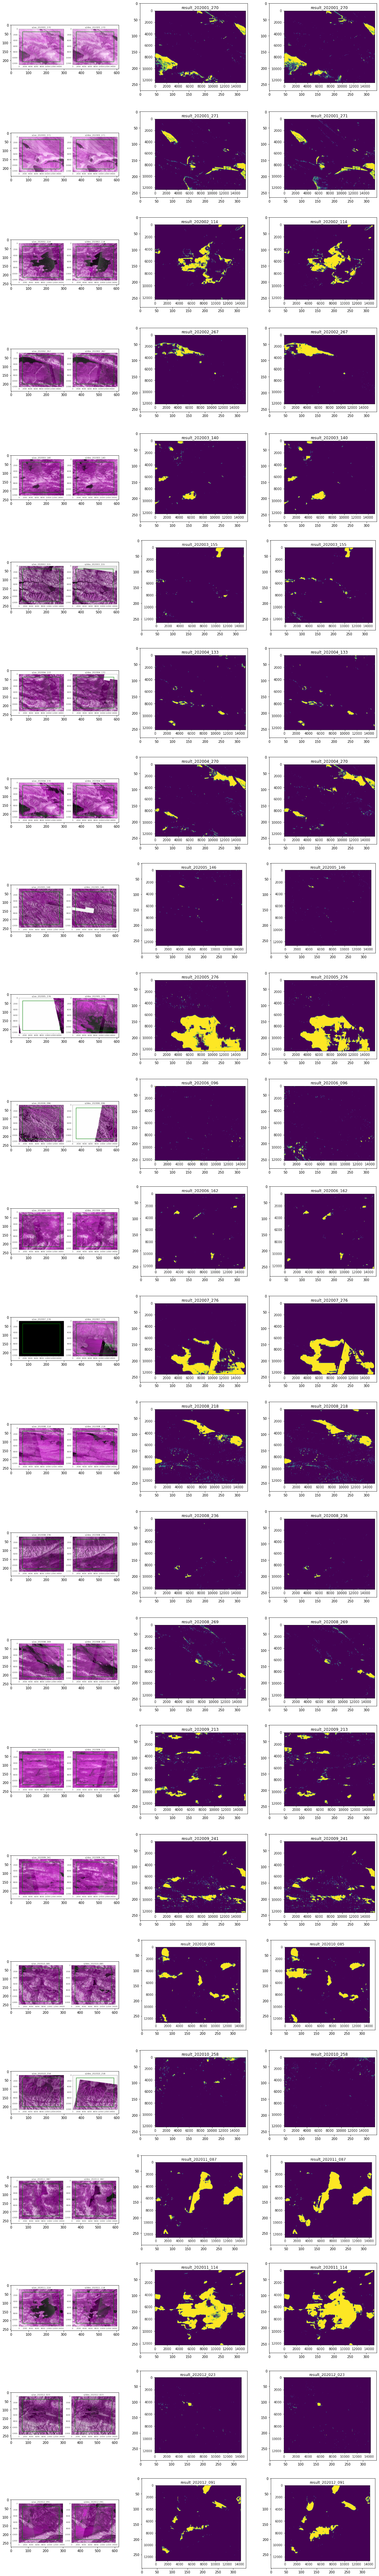

In [27]:
dir_fig_base = config.root_proj+'/figure/check_tiles_base'
paths_fig_s1img = glob(dir_fig_base + '/*_s1img.png')
paths_fig_base = glob(dir_fig_base + '/*_wat.png')
paths_fig_s1img.sort(); paths_fig_base.sort()
dir_fig_improve = config.root_proj + '/figure/check_tiles_improve'
paths_fig_improve = glob(dir_fig_improve + '/*_wat.png')
paths_fig_improve.sort()

n_img = len(paths_fig_base)
plt.figure(figsize=(20, 6*n_img))
for i, path_fig_s1img in enumerate(paths_fig_s1img):
  s1img = mpimg.imread(path_fig_s1img)
  plt.subplot(n_img, 3, i*3+1)
  imgplot_1 = plt.imshow(s1img)

  wat_base = mpimg.imread(paths_fig_base[i])
  plt.subplot(n_img,3, i*3+2)
  imgplot_2 = plt.imshow(wat_base)

  wat_improve = mpimg.imread(paths_fig_improve[i])
  plt.subplot(n_img,3, i*3+3)
  imgplot_3 = plt.imshow(wat_improve)
